## K Nearest Neighbors

In [15]:
# import packages 

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [16]:
# Load data
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00528/dataset.csv", header = 1, sep = ";")

In [28]:
df.head()

,Motorway,SR,NR,OR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
0,A1,600,1,50,0,0,0,0,0,0,0
1,A1,700,1,75,0,1,1,0,0,1,0
2,A1,200,1,75,0,1,1,0,0,1,0
3,A1,300,1,25,0,0,1,0,0,0,0
4,A1,600,2,99,0,1,1,1,0,1,1


In [36]:
# Remove unnecessary response variables 
#print(df.columns.tolist())

# Remove any leading or trailing spaces in column names
df.columns = df.columns.str.strip()

# Drop the unnecessary columns
df = df.drop(columns=['Green frogs', 'Brown frogs', 'Common toad', 'Tree frog', 'Common newt', 'Great crested newt'], errors='ignore')

# Verify the result
print(df.head())

  Motorway   SR  NR  OR  Fire-bellied toad
0       A1  600   1  50                  0
1       A1  700   1  75                  0
2       A1  200   1  75                  0
3       A1  300   1  25                  0
4       A1  600   2  99                  1


In [38]:
# Proportion of response variable

df['Fire-bellied toad'].value_counts()

0    131
1     58
Name: Fire-bellied toad, dtype: int64

[None]

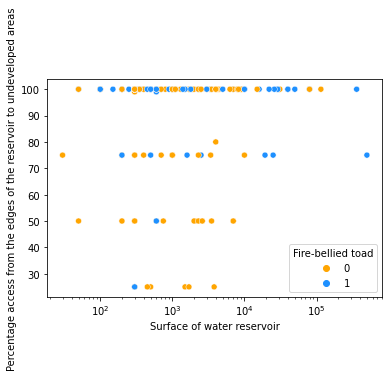

In [39]:
#Scatterplot 1

p =sns.scatterplot(x="SR", y="OR", hue="Fire-bellied toad",
              data=df,palette=['orange','dodgerblue'], legend='full')
plt.xlabel('Surface of water reservoir')
plt.ylabel('Percentage access from the edges of the reservoir to undeveloped areas')
p.set(xscale="log")

[None]

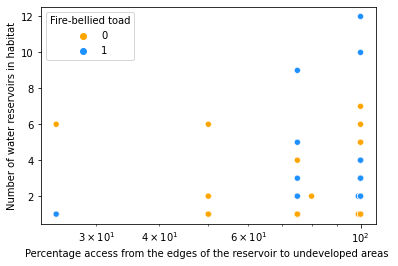

In [40]:
#Scatterplot 2

p =sns.scatterplot(x="OR", y="NR", hue="Fire-bellied toad",
              data=df,palette=['orange','dodgerblue'], legend='full')
plt.xlabel('Percentage access from the edges of the reservoir to undeveloped areas ')
plt.ylabel('Number of water reservoirs in habitat')
p.set(xscale="log")

[None]

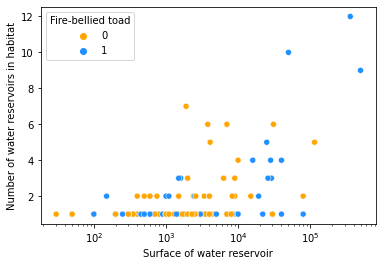

In [73]:
#Scatterplot 3

p =sns.scatterplot(x="SR", y="NR", hue="Fire-bellied toad",
              data=df,palette=['orange','dodgerblue'], legend='full')
plt.xlabel('Surface of water reservoir')
plt.ylabel('Number of water reservoirs in habitat')
p.set(xscale="log")

In [44]:
# Splitting Data
x = df.iloc[:, 1:-1].values
y = df.iloc[:, 4].values

In [46]:
# Creating Train and Test Data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40)

In [47]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [48]:
classifier = KNeighborsClassifier(n_neighbors = 3)

In [50]:
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [55]:
y_pred = classifier.predict(x_test)
print(y_pred)

[1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0
 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1
 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1]


In [56]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[46 28]
 [13  8]]
              precision    recall  f1-score   support

           0       0.78      0.62      0.69        74
           1       0.22      0.38      0.28        21

    accuracy                           0.57        95
   macro avg       0.50      0.50      0.49        95
weighted avg       0.66      0.57      0.60        95



Text(0, 0.5, 'Error rate')

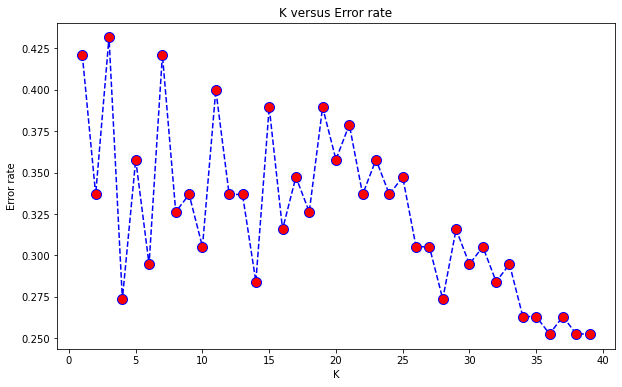

In [58]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    
    error_rate.append(np.mean(pred_i != y_test))
    
   
plt.figure(figsize=(10, 6))

plt.plot(range(1, 40), error_rate, color='blue', linestyle='--',
         markersize=10, markerfacecolor='red', marker='o')
plt.title('K versus Error rate')
plt.xlabel('K')
plt.ylabel('Error rate')

In [60]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.40)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.40)
scaler = StandardScaler()
scaler.fit(X_train2)
scaler.fit(X_train3)
X_train2 = scaler.transform(X_train2)
X_test2 = scaler.transform(X_test2)

X_train3 = scaler.transform(X_train3)
X_test3 = scaler.transform(X_test3)

In [61]:
# Create new KNN object with 36 neighbors
classifier2 = KNeighborsClassifier(n_neighbors = 36)


In [62]:
classifier2.fit(X_train2, y_train2)

KNeighborsClassifier(n_neighbors=36)

In [63]:
y_pred2 = classifier2.predict(X_test2)
print(y_pred2)

[0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0
 0 0]


In [64]:
print(confusion_matrix(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))

[[53  0]
 [ 6 17]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        53
           1       1.00      0.74      0.85        23

    accuracy                           0.92        76
   macro avg       0.95      0.87      0.90        76
weighted avg       0.93      0.92      0.92        76



In [74]:
classifier3 = KNeighborsClassifier(n_neighbors = 3)

In [75]:
classifier3.fit(X_train3, y_train3)

KNeighborsClassifier(n_neighbors=3)

In [76]:
y_pred3 = classifier3.predict(X_test3)
print(y_pred3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0
 1 0]


In [77]:
# Print confusion matrix and classification report for third KNN test 

print(confusion_matrix(y_test3, y_pred3))
print(classification_report(y_test3, y_pred3))

[[56  0]
 [ 1 19]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        56
           1       1.00      0.95      0.97        20

    accuracy                           0.99        76
   macro avg       0.99      0.97      0.98        76
weighted avg       0.99      0.99      0.99        76

